In [32]:
# Load necessary libraries
library(tidyverse)

In [14]:
# Load the datasets
players <- read_csv("./data/players.csv")
sessions <- read_csv("./data/sessions.csv")


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [33]:
# Convert experience and gender into factor
players$experience <- as.factor(players$experience)
players$gender <- as.factor(players$gender)

# Add Duration
sessions$duration_minutes <- as.numeric(difftime(sessions$end_time, sessions$start_time, units = "mins"))

In [34]:
## Left JOIN Players to Sessions

merged_data <- players %>% left_join(sessions, by = "hashedEmail")
head(merged_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,start_time,end_time,original_start_time,original_end_time,duration_minutes
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024 00:21,08/08/2024 01:35,1.72308e+12,1.72308e+12,0
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,09/09/2024 22:30,09/09/2024 22:37,1.72592e+12,1.72592e+12,0
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024 02:41,08/08/2024 03:25,1.72308e+12,1.72309e+12,0
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,10/09/2024 15:07,10/09/2024 15:29,1.72598e+12,1.72598e+12,0
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,05/05/2024 22:21,05/05/2024 23:17,1.71495e+12,1.71495e+12,0
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,06/04/2024 22:24,06/04/2024 23:33,1.71244e+12,1.71245e+12,0


In [35]:
## Statsistics for players

summary(players)

    experience subscribe       hashedEmail         played_hours    
 Amateur :63   Mode :logical   Length:196         Min.   :  0.000  
 Beginner:35   FALSE:52        Class :character   1st Qu.:  0.000  
 Pro     :14   TRUE :144       Mode  :character   Median :  0.100  
 Regular :36                                      Mean   :  5.846  
 Veteran :48                                      3rd Qu.:  0.600  
                                                  Max.   :223.100  
                                                                   
     name                         gender         Age       
 Length:196         Agender          :  2   Min.   : 8.00  
 Class :character   Female           : 37   1st Qu.:17.00  
 Mode  :character   Male             :124   Median :19.00  
                    Non-binary       : 15   Mean   :20.52  
                    Other            :  1   3rd Qu.:22.00  
                    Prefer not to say: 11   Max.   :50.00  
                    Two-Spirited    

In [36]:
## Statsistics for merged_data

summary(merged_data)

    experience  subscribe       hashedEmail         played_hours   
 Amateur :841   Mode :logical   Length:1606        Min.   :  0.00  
 Beginner:119   FALSE:123       Class :character   1st Qu.: 23.70  
 Pro     : 42   TRUE :1483      Mode  :character   Median : 56.10  
 Regular :532                                      Mean   : 94.21  
 Veteran : 72                                      3rd Qu.:178.20  
                                                   Max.   :223.10  
                                                                   
     name                         gender          Age        start_time       
 Length:1606        Agender          :  11   Min.   : 8.0   Length:1606       
 Class :character   Female           : 395   1st Qu.:17.0   Class :character  
 Mode  :character   Male             :1056   Median :18.0   Mode  :character  
                    Non-binary       : 113   Mean   :19.4                     
                    Other            :   1   3rd Qu.:23.0    

In [37]:
## Check factors

table(players$experience)
table(players$subscribe)


 Amateur Beginner      Pro  Regular  Veteran 
      63       35       14       36       48 


FALSE  TRUE 
   52   144 

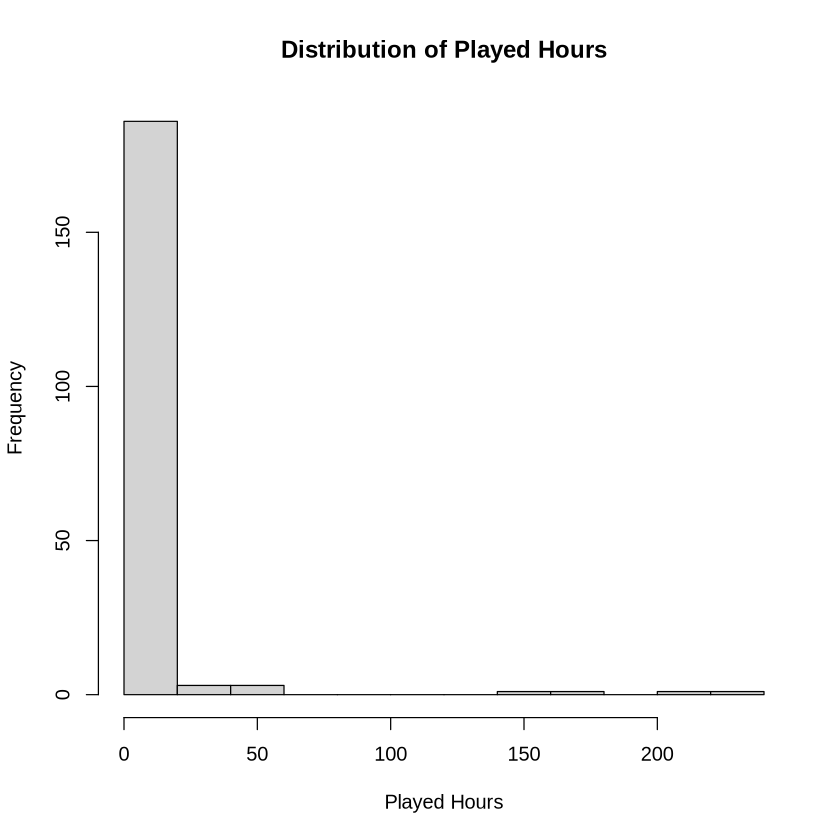

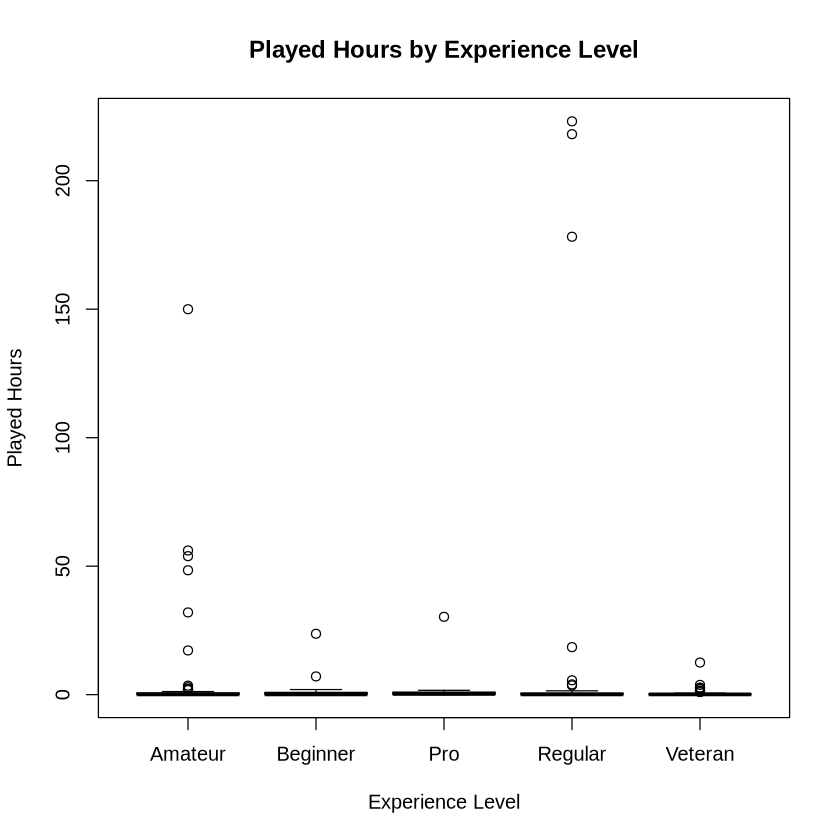

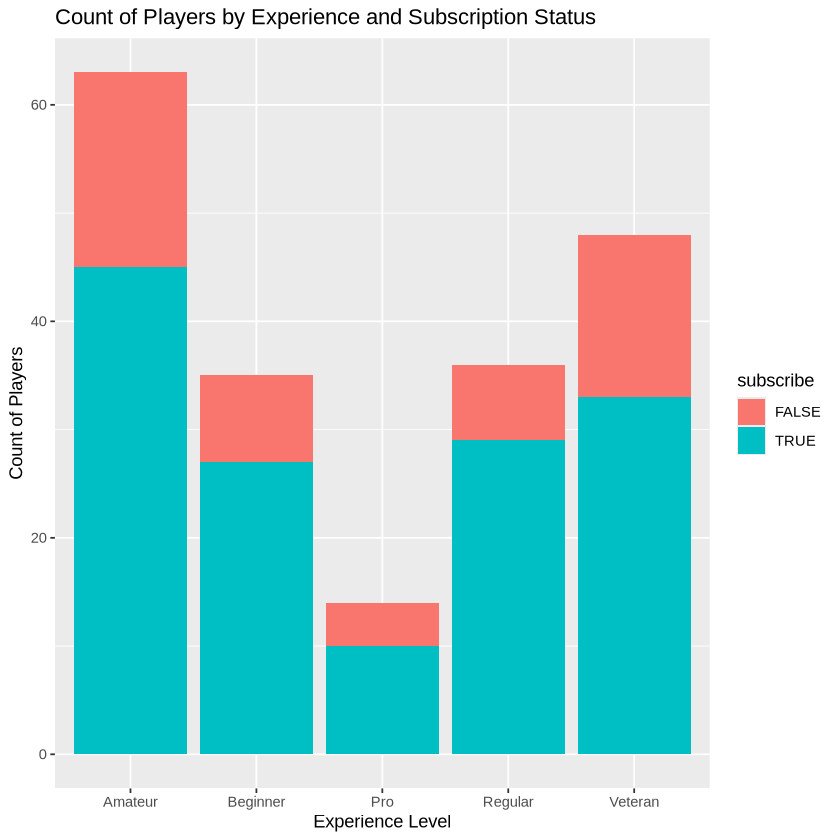

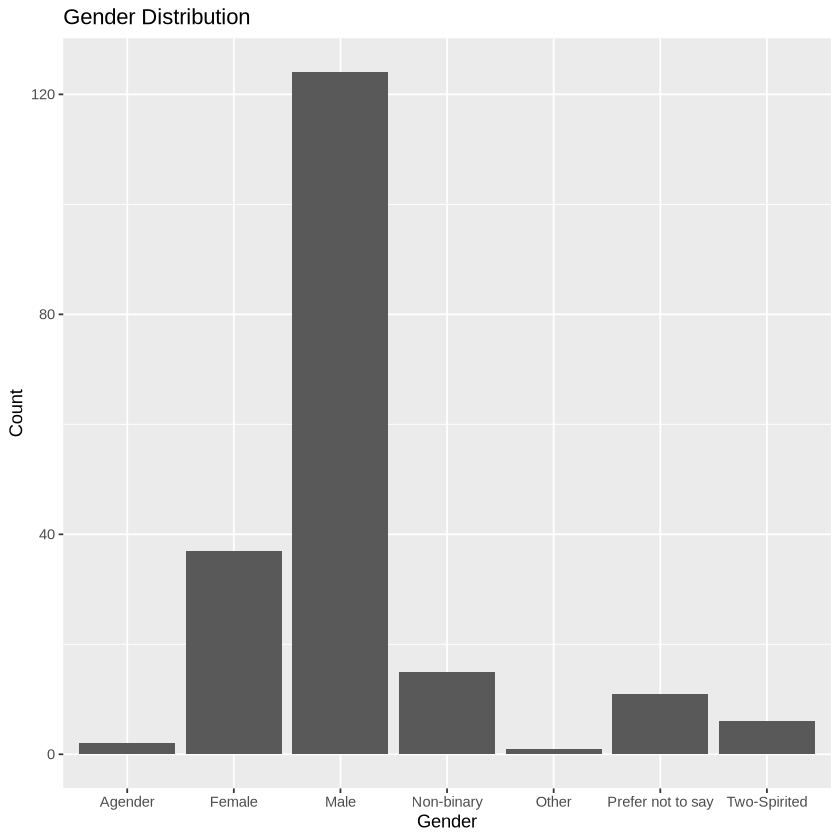

In [31]:
## Visualization

hist(players$played_hours, main = "Distribution of Played Hours", xlab = "Played Hours")

boxplot(played_hours ~ experience, data = players,
    main = "Played Hours by Experience Level",
    xlab = "Experience Level", ylab = "Played Hours")

ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar() +
  labs(title = "Count of Players by Experience and Subscription Status",
       x = "Experience Level",y = "Count of Players")

ggplot(players, aes(x = gender)) +
  geom_bar() +
  labs(title = "Gender Distribution", x = "Gender", y = "Count")
